In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA


In [75]:
db = pd.read_csv("../datasets/Wholesale customers data.csv")
X = db.drop(columns=["Channel", "Region"])

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


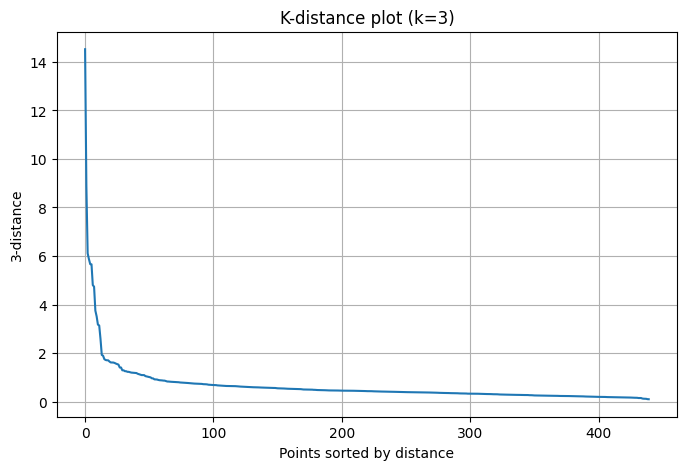

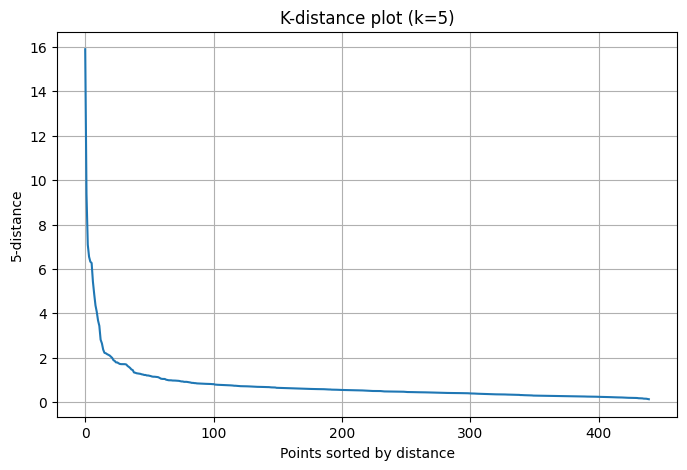

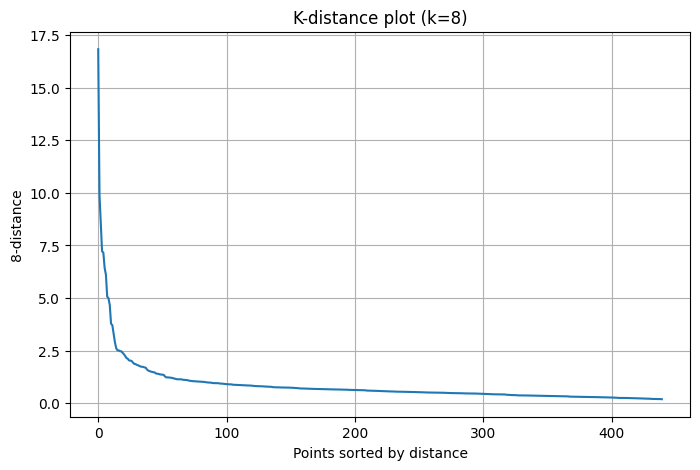

In [77]:
for min_samples in [3, 5, 8]:
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X_scaled)
    distances, indices = neighbors_fit.kneighbors(X_scaled)
    
    # Prendi la distanza dal k-esimo vicino (ultima colonna)
    k_distances = distances[:, min_samples-1]
    k_distances = sorted(k_distances, reverse=True)
    
    # Plot k-distance
    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.title(f'K-distance plot (k={min_samples})')
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{min_samples}-distance')
    plt.grid(True)
    plt.show()

In [78]:
dbscan = DBSCAN(eps=1.5, min_samples=3)  
db_labels = dbscan.fit_predict(X_scaled)

In [79]:
unique_labels = set(db_labels)
palette = sns.color_palette("Set2", len(unique_labels))
color_map = {
    label: palette[i] if label != -1 else (0.6, 0.6, 0.6)
    for i, label in enumerate(sorted(unique_labels))
}
colors = [color_map[label] for label in db_labels]

In [80]:
sl_score = silhouette_score(X_scaled, db_labels)
print(f'Silhouette Score: {sl_score:.3f}')

print(f'n_clusters: {len(unique_labels) - (1 if -1 in db_labels else 0)}')

Silhouette Score: 0.421
n_clusters: 3


In [81]:
# PCA per visualizzazione 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

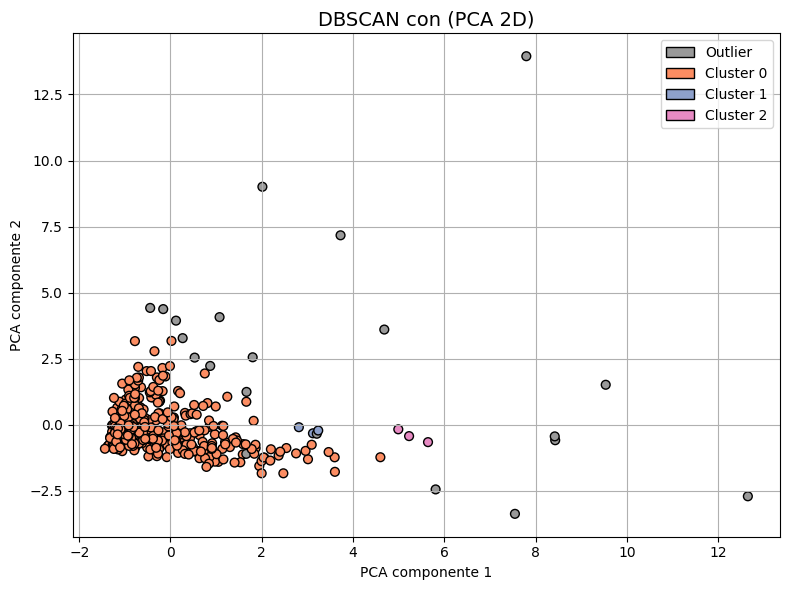

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=40, edgecolor='black')
plt.title("DBSCAN con (PCA 2D)", fontsize=14)
plt.xlabel("PCA componente 1")
plt.ylabel("PCA componente 2")
plt.grid(True)
# Legenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_map[label], edgecolor='black',
          label=f"Cluster {label}" if label != -1 else "Outlier")
    for label in sorted(unique_labels)
]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

**VALUTAZIONE PCA E DBSCAN**
Concentrazione di punti molto alta, problemi di punti sovrapposti che non permettono una corretta visualizzazione in 2D, andrebbe eseguita una visualizzazione in 3D per poter individuare eventuali gruppi omogenei.
Si può individuare quindi un gruppo omogeneo di consumatori che hanno dei consumi sovrapponibili.
